# Outputs a summary of each variable to a single text file,

Download the iris data set using SKLEARN

[Scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

Recource to easily read CSV

[Pandas.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [22]:
# import Pandas to load the datasets
import pandas as pd

# Import sklearn
import sklearn as skl


In [23]:
# Load dataset. This command loads the iris data set and its features. 
data = skl.datasets.load_iris()

In [24]:
# print
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  




I refer to [Pandas Dataframe Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for guidance to set up a dataframe

In [25]:
# load the iris dataset through Pandas CVS
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

Using the df.describe(): function here so that it gives us summary for  dataset. It shows statistics to review such as the count, mean, standard deviation, min, max, and quartiles for each feature. 


Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [26]:
# Summerise the data set
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using summary = to store the results a a variable that we can call back to later

In [27]:
# Store the results as a variable
summary = df.describe()

Using describe() to produce a table, and then using to_string() to convert it into  readable string format. Then storing that string in a variable using summary_txt = 


[Link] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html#

Trouble shooting - got a name error running the below code. Got this as I wasn't working with "DataFrame" anymore. I stored it as the variable "summary" in the cell above, which made the variable summary a Pandas Dataframe. So I needed to to change it to run to_string() correctly.

Found this resource helpful to fix this

[Link] https://stackoverflow.com/questions/66317262/pandas-df-dataframe-is-not-defined#:~:text=That%20NameError%20you%27re%20getting%20happens%20because%20you%27re%20referring,Python%22%20on%20Google%20to%20look%20for%20more%20info.


In [28]:
# Save the summary to a text file
# summary_txt = DataFrame.to_string()

# NameError: name 'DataFrame' is not defined

In [29]:
# Save the summary to a text file
summary_txt = summary.to_string()


file_path = states the path where I want to save the summary file. I have set it so that the file will be saved in the current working directory with the name iris_summary.txt.

[Link] https://www.delftstack.com/howto/python/set-file-path-python/

In [30]:
# Define the path where the file will be saved
file_path = 'iris_summary.txt'


This opens a file for writing. If the file doesn't exist, it will be created. If it does exist, the content will be overwritten ('w' stands for write mode).

[Link] https://www.geeksforgeeks.org/file-handling-python/

In [31]:
# Write the summary to the text file
with open(file_path, 'w') as f:
    f.write(summary_txt)


The print function along with the f string will print a message to the terminal, confirming that the summary has been successfully saved to the file. 

Section 2.4.3. f-strings on the below rescource 

[Link] https://docs.python.org/3/reference/lexical_analysis.html#f-strings

In [32]:
print(f"Summary saved to {file_path}")


Summary saved to iris_summary.txt


# Saves a histogram of each variable to png file

Importing matplotlib.pyplot as plt. I am using the module pyplot to create plots and figures. This will create the histogram

[Link]https://matplotlib.org/stable/plot_types/stats/hist_plot.html#sphx-glr-plot-types-stats-hist-plot-py

In [33]:
# Install packages
import matplotlib.pyplot as plt


Using Numpy to handle arrays for the dataset

[Link] https://numpy.org/doc/2.2/user/absolute_beginners.html

In [34]:
# Install packages
import numpy as np


In [35]:
# Import data set
from sklearn.datasets import load_iris



data holds the features (input variables) of the Iris dataset. It's a 2D array where each row represents an iris flower and each column represents a feature (e.g., sepal length, sepal width, etc.).

In [36]:
# Load data set
iris = load_iris()

data = iris.data


feature_names stores the list of names of the features (i.e., the column names of iris.data). These names correspond to the measurements of the iris flowers, such as sepal length (cm), sepal width (cm), etc.

In [37]:
feature_names = iris.feature_names


Using the plt.figure function creates a new figure, which is like a blank canvas for each histogram.

Using figsize=(6, 4) sets the size of the figure to 6 inches by 4 inches. 

[Matplotlib.org](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)

Using the plt.hist(data[:, i], ...) function to create a histogram for the feature at index i. 
The data[:, i] slices the dataset to get the i-th column, which reflects the data for a specific feature 

bins= I set the number of bins to 20 

I change the  colours of each histogram to distinguish them from each other. - link in here matplot lib colour maps reference https://matplotlib.org/stable/users/explain/colors/colors.html

[Link] https://www.bing.com/search?pglt=2083&q=Matplotlib+hist()+Function&cvid=b126dbe119e4411db1b38b1c86d2f502&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMggIAhDpBxj8VdIBBzg0NmowajGoAgCwAgA&FORM=ANNAB1&PC=U531

Using the function plt.xlabel(feature) to add a label to the x-axis of the histogram. This is set to show the feature data

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html

Using the function plt.ylabel("Frequency") to add a label to the y-axis of the histogram. This is set to show the the frequency of the feature's measurements 


[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

Using plt.title(f"Histogram of {feature}") to set the titleof the plot. I am using an f - string to add the name of the feature.

[Link] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html

In [38]:
# Check how the names of the features appear in the dataset.
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


I was getting a Key Error:  'sepal lengh (cm)' cell execution error for this line: when I didn't match it to the column names exactly. I used ChatGBT to help me figure this error out - https://chatgpt.com/share/680e8aeb-0284-8012-94af-cb39c6dba68d

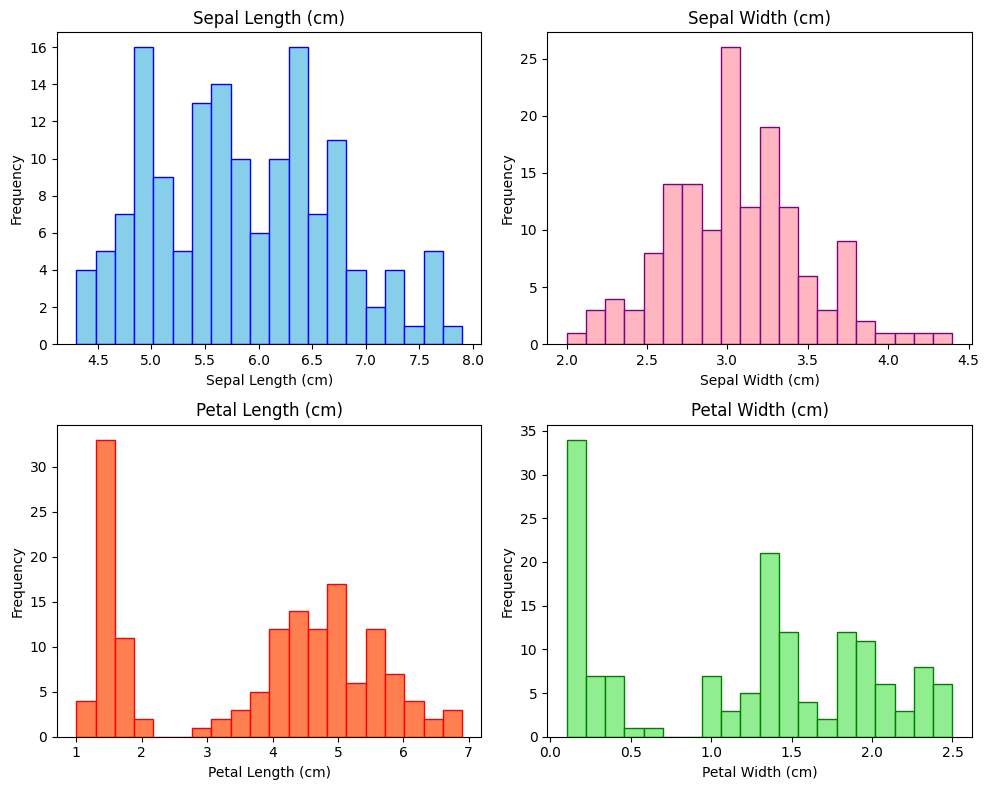

In [39]:
# Plot histograms for each feature.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

# Plot each feature's histogram.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

axes[0, 0].hist(df['sepal_length'], bins=20, color='skyblue', edgecolor='blue')

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

axes[0, 0].set_title('Sepal Length (cm)')

# Set the x-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html

axes[0, 0].set_xlabel('Sepal Length (cm)')

# Set the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

axes[0, 0].set_ylabel('Frequency')

# Repeat the above steps for the remaining 3 features, changing colours of each histogram to distinguish them from each other.

axes[0, 1].hist(df['sepal_width'], bins=20, color='lightpink', edgecolor='purple')
axes[0, 1].set_title('Sepal Width (cm)')
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['petal_length'], bins=20, color='coral', edgecolor='red')
axes[1, 0].set_title('Petal Length (cm)')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['petal_width'], bins=20, color='lightgreen', edgecolor='green')
axes[1, 1].set_title('Petal Width (cm)')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')



# Adjust layout to prevent overlap
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

plt.tight_layout()


# Save the histogram as a png.
plt.savefig('Histogram.png')

# Show the plots
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

plt.show()

## Scatterplots

To create the scatter plot, I start by loading the target classes and storing them as a variable to call on in the scatterplot. I set the fig size first before plotting the scatterplot. I refer to the [Matplotlib Scatterplot Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) but I also found [W3Schools Matplotlib Scatter](https://www.w3schools.com/python/matplotlib_scatter.asp) a useful resource, particularly for the colour map and colour schemes. [Matplotlib Colour Maps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) was an additional resource I used for the colour maps.

I c=target in plt.scatter() to color-code the points according to the target labels. Cmap gives us the colour scheme, I chose plasma. Edgecolour is the colour surrounding the bins, k is black. The s parameter in plt.scatter() allows me to adjust the size of the markers used to represent the data points. 

Then I set my title, x-axis and y-axis like I have done in the above task. I chose the two features; sepel length and petal lenght and  label the x-axis and y-axis to reflect this. [See set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html), [set_x_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [set_y_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html).

/tmp/ipykernel_1634/551628966.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colourmap = cm.get_cmap('plasma', 3)


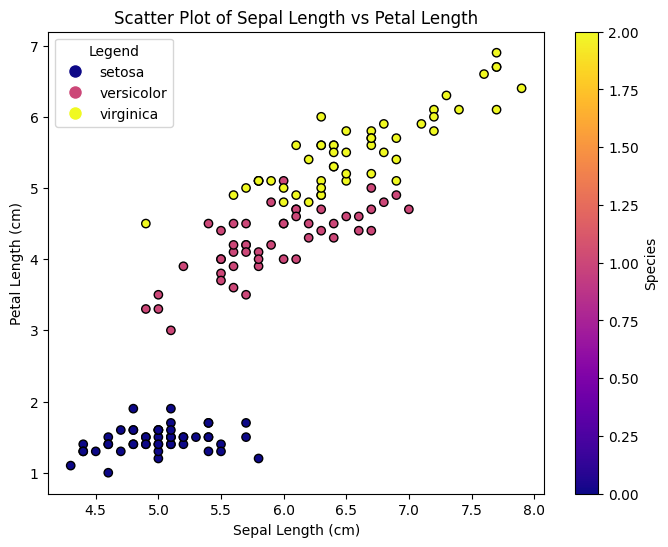

In [40]:
# Import libraries from matplotlib.

# Using Line2D for this to colour code the legend.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
from matplotlib.lines import Line2D

# Using cm to create the color map.
# See: https://matplotlib.org/stable/tutorials/colors/colormaps.html
import matplotlib.cm as cm

# Import necessary libraries from scikit-learn and pandas.
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris dataset properly to access attributes like .target and .target_names.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
data = load_iris()

# Create a DataFrame from the data for easier plotting.
# See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
df = pd.DataFrame(data.data, columns=data.feature_names)

# Store the target classes data as a variable to call on in the scatterplot.
# See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
target_classes = data.target

# Set the figsize.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(8, 6)) 

# Generate a scatter plot using two chosen features; sepal length and petal length.
# Add color-coding based on the target classes.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# See: https://www.w3schools.com/python/matplotlib_scatter.asp
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=target_classes, cmap='plasma', edgecolor='black')

# Custom legend using Line2D.
# Colourmap will set the colours of the data in the legend. It is set to plasma to match the scatter plot.
# 3 is the number of colour for the legend, to match the amount of species in the dataset.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
colourmap = cm.get_cmap('plasma', 3)

# Create custom legend elements to label the species and colour code it.
# Each Line2D object represents one item in the legend.
# Marker='o' means it shows a circular dot which will match the scatter plot).
# Markerfacecolor sets the color of the dot using the colormap for each species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_markeredgecolor

legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[0],
           markerfacecolor=colourmap(0 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[1],
           markerfacecolor=colourmap(1 / 2), markersize=10),
    Line2D([0], [0], marker='o', color='w',
           label=data.target_names[2],
           markerfacecolor=colourmap(2 / 2), markersize=10),
]

# Add the legend to the plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(handles=legend_elements, title="Legend")

# Set the title.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
plt.title("Scatter Plot of Sepal Length vs Petal Length")

# Set the x-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
plt.xlabel("Sepal Length (cm)")

# Set the y-axis.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
plt.ylabel("Petal Length (cm)")

# Add a color bar to indicate the Iris Species.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
plt.colorbar(label='Species')

# Show the plot.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.show()


add a regression line here to this scatter plot 

First go at a box plot 

I refer to [Geeksforgeeks.org](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/) for information on Boxplots as well as refer to the [Offical Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

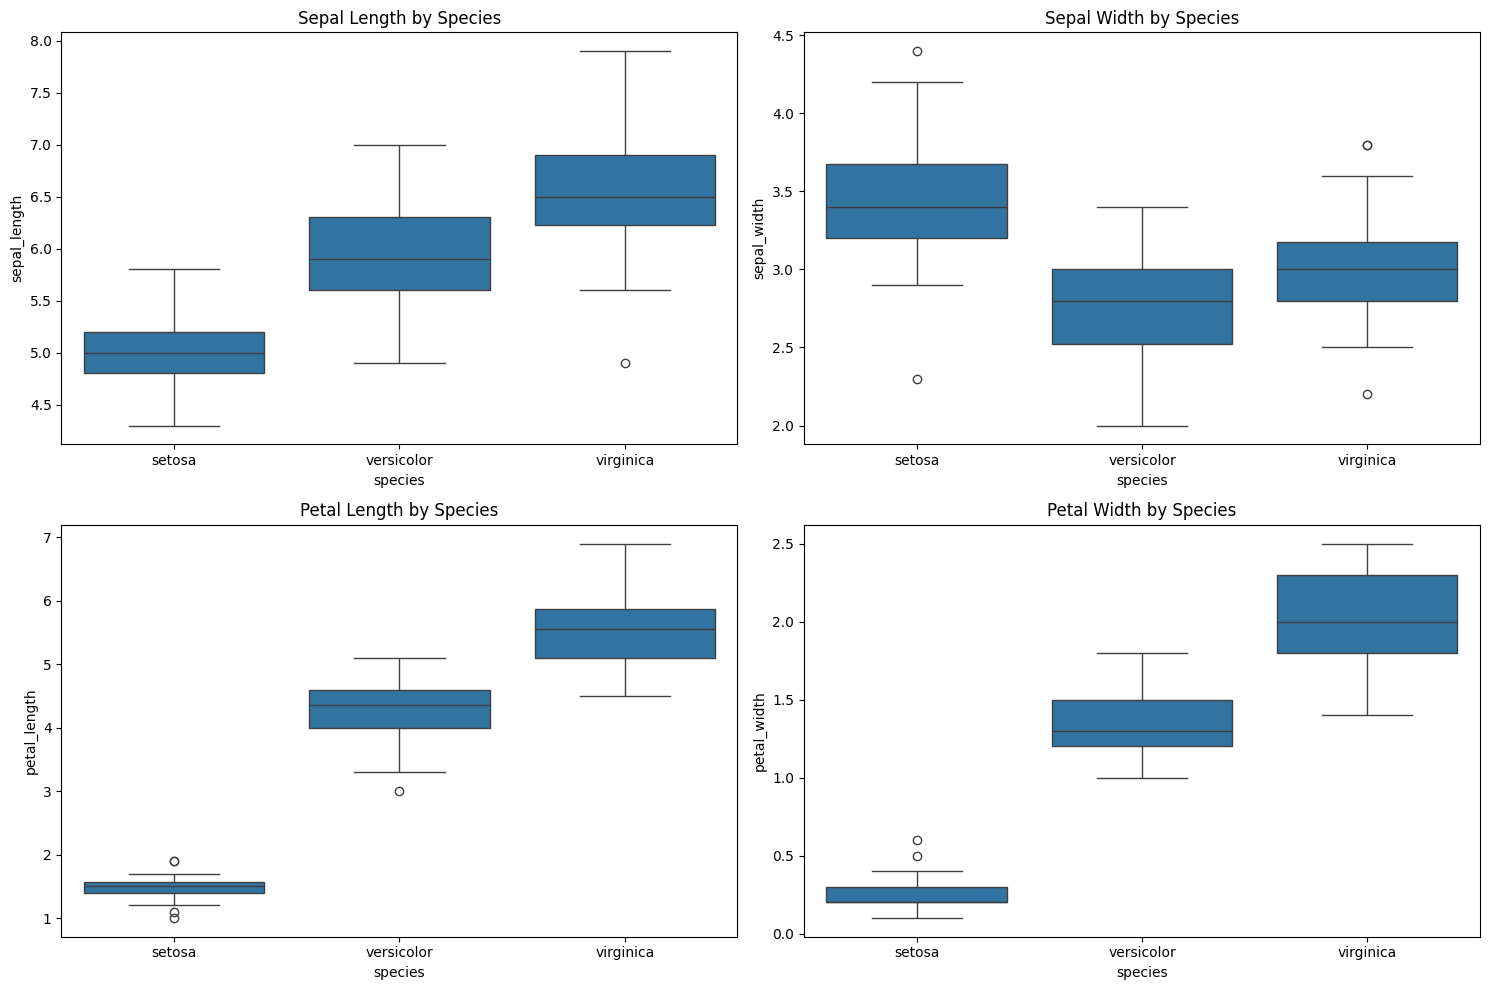

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset.
# See: https://seaborn.pydata.org/generated/seaborn.load_dataset.html.
# This will load the iris dataset from seaborn's built-in datasets.
iris = sns.load_dataset("iris")

# Define the features to plot.
# See: https://seaborn.pydata.org/tutorial/axis_grids.html

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create the figure.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# I am setting the figure size to 15x10 inches.
# I believe this will be a good size for showing the four subplots.

plt.figure(figsize=(15, 10))

# Manually create subplots for each feature.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
# I am using a 2x2 grid of subplots.
# I am going to use seaborn's boxplot function to create the boxplots as I like the colours in them.
# See: https://seaborn.pydata.org/tutorial/axis_grids.html
# See: https://seaborn.pydata.org/tutorial/boxplot.html

# Each subplot will generate a boxplot of the feature against the species.

# The first subplot generates the sepal length for each species.

plt.subplot(2, 2, 1)
sns.boxplot(data=iris, x='species', y=features[0])
plt.title(f'{features[0].replace("_", " ").title()} by Species')


# The second subplot generates the sepal width for each species.

plt.subplot(2, 2, 2)
sns.boxplot(data=iris, x='species', y=features[1])
plt.title(f'{features[1].replace("_", " ").title()} by Species')

# The third subplot generates the petal length for each species.

plt.subplot(2, 2, 3)
sns.boxplot(data=iris, x='species', y=features[2])
plt.title(f'{features[2].replace("_", " ").title()} by Species')

# The fourth subplot generates the petal width for each species.

plt.subplot(2, 2, 4)
sns.boxplot(data=iris, x='species', y=features[3])
plt.title(f'{features[3].replace("_", " ").title()} by Species')

# Adjust the layout to prevent overlap.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
# This will make sure the subplots are nice and tidy and not going to interfere with each other.

plt.tight_layout()

# Show the boxplots.

plt.show()


 ## Why choose a box plot for analaysis ? 


I can see the distribution for each of the features and for each of the Flower Species

Each box plot shows the median, quartiles, and potential outliers for each flower and feature.

Median is the middle line of the box, this will give the central tendency.

Box is the interquartile range and it will show the spread of the middle 50% of data.

Whiskers will suggest  the spread of the data (excluding outliers).

Dots will highlight outliers. As we can see, the iris setosa has a much smaller petal lenght than the other two and it shows up as a dot outside the whiskers.


https://wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

https://stackoverflow.com/questions/66395848/boxplot-what-do-the-dots-represent

## Analysis 


Setosa is usually distinct: especially in petal length and petal width, where it forms a non-overlapping distribution with the others. As I can see, the iris setosa has a much smaller petal lenght than the other two and it shows up as a dot outside the whiskers.

Versicolor and Virginica often overlap, but Virginica tends to have larger values for most features.


Petal length and petal width are highly discriminative Setosa is completely separate.

Sepal width has more overlap, especially between species — it’s likely a weaker predictor.
